In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
path = './dataFolder/AffineTransformation/'

In [3]:
MIN_MATCH_COUNT = 10
img1 = cv.imread(path + 'M3_1/M3_ventHW_full.png',0)          # queryImage
pt1_file = pd.read_csv(path + 'M3_1/Results.csv')
img2 = cv.imread(path + 'M13_2/m13right_ventHW_full.png',0)   # trainImage
pt2_file = pd.read_csv(path + 'M13_2/Results.csv')

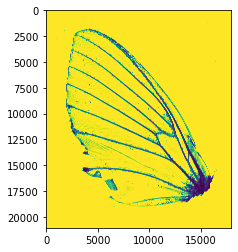

In [4]:
plt.imshow(img1)

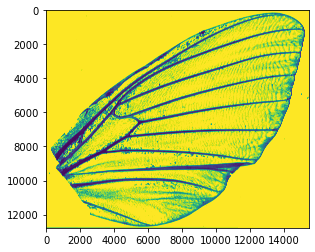

In [9]:
plt.imshow(img2)

In [10]:
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [19]:
MIN_MATCH_COUNT = 10

In [57]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

dst = cv.warpPerspective(img1,M, (img2.shape[1], img2.shape[0]))
# img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)

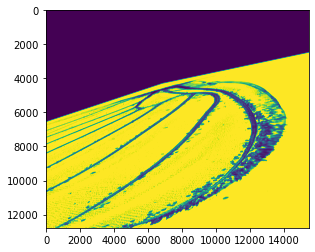

In [58]:
plt.imshow(dst)